# Problem 1: Basics of Neural Networks
* <b>Learning Objective:</b> In this problem, you are asked to implement a basic multi-layer fully connected neural network from scratch, including forward and backward passes of certain essential layers, to perform an image classification task on the SVHN dataset. You need to implement essential functions in different indicated python files under directory `lib`.
* <b>Provided Code:</b> We provide the skeletons of classes you need to complete. Forward checking and gradient checkings are provided for verifying your implementation as well.
* <b>TODOs:</b> You are asked to implement the forward passes and backward passes for standard layers and loss functions, various widely-used optimizers, and part of the training procedure. And finally we want you to train a network from scratch on your own. Also, there are inline questions you need to answer. See `README.md` to set up your environment.

In [1]:
from lib.mlp.fully_conn import *
from lib.mlp.layer_utils import *
from lib.mlp.datasets import *
from lib.mlp.train import *
from lib.grad_check import *
from lib.optim import *
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Loading the data (SVHN)
Run the following code block to download SVHN dataset and load in the properly splitted SVHN data. The script `get_datasets.sh` use `wget` to download the SVHN dataset. If you have a trouble with executing `get_datasets.sh`, you can manually download the dataset and extract files.

In [3]:
!./get_datasets.sh
# !get_datasets.sh for windows users

--2022-02-11 08:15:38--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘data/train_32x32.mat’

train_32x32.mat     100%[===================>] 173.61M  40.8MB/s    in 5.6s    

2022-02-11 08:15:43 (31.2 MB/s) - ‘data/train_32x32.mat’ saved [182040794/182040794]

--2022-02-11 08:15:43--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘data/test_32x32.mat’

test_32x32.mat      100%[===================>]  61.30M  18.5MB/s    in 5.0s    

2022-02-11 08:15:49 (12.2 MB/s) - ‘data/test_32x32.mat

Load the dataset.

In [2]:
data = SVHN_data()
for k, v in data.items():
    print ("Name: {} Shape: {}".format(k, v.shape))

Name: data_train Shape: (70000, 32, 32, 3)
Name: labels_train Shape: (70000,)
Name: data_val Shape: (3257, 32, 32, 3)
Name: labels_val Shape: (3257,)
Name: data_test Shape: (26032, 32, 32, 3)
Name: labels_test Shape: (26032,)


## Implement Standard Layers
You will now implement all the following standard layers commonly seen in a fully connected neural network (aka multi-layer perceptron, MLP). Please refer to the file `lib/mlp/layer_utils.py`. Take a look at each class skeleton, and we will walk you through the network layer by layer. We provide results of some examples we pre-computed for you for checking the forward pass, and also the gradient checking for the backward pass.

## FC Forward [2pt]
In the class skeleton `flatten` and `fc` in `lib/mlp/layer_utils.py`, please complete the forward pass in function `forward`. The input to the `fc` layer may not be of dimension (batch size, features size), it could be an image or any higher dimensional data. We want to convert the input to have a shape of (batch size, features size). Make sure that you handle this dimensionality issue. 

In [3]:
%reload_ext autoreload

# Test the fc forward function
input_bz = 3 # batch size
input_dim = (7, 6, 4)
output_dim = 4

input_size = input_bz * np.prod(input_dim)
weight_size = output_dim * np.prod(input_dim)

flatten_layer = flatten(name="flatten_test")
single_fc = fc(np.prod(input_dim), output_dim, init_scale=0.02, name="fc_test")

x = np.linspace(-0.1, 0.4, num=input_size).reshape(input_bz, *input_dim)
w = np.linspace(-0.2, 0.2, num=weight_size).reshape(np.prod(input_dim), output_dim)
b = np.linspace(-0.3, 0.3, num=output_dim)

single_fc.params[single_fc.w_name] = w
single_fc.params[single_fc.b_name] = b

out = single_fc.forward(flatten_layer.forward(x))

correct_out = np.array([[0.63910291, 0.83740057, 1.03569824, 1.23399591],
                        [0.61401587, 0.82903823, 1.04406058, 1.25908294],
                        [0.58892884, 0.82067589, 1.05242293, 1.28416997]])

# Compare your output with the above pre-computed ones. 
# The difference should not be larger than 1e-8
print ("Difference: ", rel_error(out, correct_out))

Difference:  4.02601593296122e-09


## FC Backward [2pt]
Please complete the function `backward` as the backward pass of the `flatten` and `fc` layers. Follow the instructions in the comments to store gradients into the predefined dictionaries in the attributes of the class. Parameters of the layer are also stored in the predefined dictionary.

In [30]:
%reload_ext autoreload

# Test the fc backward function
inp = np.random.randn(15, 2, 2, 3)
w = np.random.randn(12, 15)
b = np.random.randn(15)
dout = np.random.randn(15, 15)

flatten_layer = flatten(name="flatten_test")
x = flatten_layer.forward(inp)
single_fc = fc(np.prod(x.shape[1:]), 15, init_scale=5e-2, name="fc_test")
single_fc.params[single_fc.w_name] = w
single_fc.params[single_fc.b_name] = b

dx_num = eval_numerical_gradient_array(lambda x: single_fc.forward(x), x, dout)
dw_num = eval_numerical_gradient_array(lambda w: single_fc.forward(x), w, dout)
db_num = eval_numerical_gradient_array(lambda b: single_fc.forward(x), b, dout)

out = single_fc.forward(x)
dx = single_fc.backward(dout)
dw = single_fc.grads[single_fc.w_name]
db = single_fc.grads[single_fc.b_name]
dinp = flatten_layer.backward(dx)

# The error should be around 1e-9
print("dx Error: ", rel_error(dx_num, dx))
# The errors should be around 1e-10
print("dw Error: ", rel_error(dw_num, dw))
print("db Error: ", rel_error(db_num, db))
# The shapes should be same
print("dinp Shape: ", dinp.shape, inp.shape)

dx Error:  4.874947933476423e-09
dw Error:  5.644760449996505e-10
db Error:  1.6690957691786146e-10
dinp Shape:  (15, 2, 2, 3) (15, 2, 2, 3)


## Leaky ReLU Forward [2pt]
In the class skeleton `leaky_relu` in `lib/mlp/layer_utils.py`, please complete the `forward` pass.

A "leaky" ReLU is similar to a ReLU, but rather than zero-ing out features valued less than 0, they are multiplied by a constant value less than 1.

$$
LeakyReLU(x) = \begin{cases} x & x \geq 0 \\ c * x & x \lt 0 \\ \end{cases}\text{, where } 0 \leq c \lt 1
$$

When $c = 0$, a Leaky ReLU is equivalent to a standard ReLU.

In [15]:
%reload_ext autoreload

# Test the leaky_relu forward function
x = np.linspace(-1.5, 1.5, num=12).reshape(3, 4)
lrelu_f = leaky_relu(negative_slope=0.01, name="leaky_relu_f")

out = lrelu_f.forward(x)

correct_out = np.array([[-0.015,        -0.0122727273, -0.0095454545, -0.0068181818],
                        [-0.0040909091, -0.0013636364,  0.1363636364,  0.4090909091],
                        [ 0.6818181818,  0.9545454545,  1.2272727273,  1.5         ]])

# Compare your output with the above pre-computed ones. 
# The difference should not be larger than 1e-7
print ("Difference: ", rel_error(out, correct_out))

Difference:  1.3333332805929594e-08


## Leaky ReLU Backward [2pt]
Please complete the `backward` pass of the class `leaky_relu`.

In [16]:
%reload_ext autoreload

# Test the relu backward function
x = np.random.randn(15, 15)
dout = np.random.randn(*x.shape)
lrelu_b = leaky_relu(negative_slope=0.01, name="leaky_relu_b")

dx_num = eval_numerical_gradient_array(lambda x: lrelu_b.forward(x), x, dout)

out = lrelu_b.forward(x)
dx = lrelu_b.backward(dout)

# The error should not be larger than 1e-10
print ("dx Error: ", rel_error(dx_num, dx))

dx Error:  5.7042412850126015e-12


## Dropout Forward [2pt]
In the class `dropout` in `lib/mlp/layer_utils.py`, please complete the `forward` pass.  
Remember that the dropout is **only applied during training phase**, you should pay attention to this while implementing the function.
##### Important Note1: The probability argument input to the function is the "keep probability": probability that each activation is kept.
##### Important Note2: If the keep_prob is set to 0, make it as no dropout.

In [17]:
%reload_ext autoreload

x = np.random.randn(100, 100) + 5.0

print ("----------------------------------------------------------------")
for p in [0, 0.25, 0.50, 0.75, 1]:
    dropout_f = dropout(keep_prob=p)
    out = dropout_f.forward(x, True)
    out_test = dropout_f.forward(x, False)

    # Mean of output should be similar to mean of input
    # Means of output during training time and testing time should be similar
    print ("Dropout Keep Prob = ", p)
    print ("Mean of input: ", x.mean())
    print ("Mean of output during training time: ", out.mean())
    print ("Mean of output during testing time: ", out_test.mean())
    print ("Fraction of output set to zero during training time: ", (out == 0).mean())
    print ("Fraction of output set to zero during testing time: ", (out_test == 0).mean())
    print ("----------------------------------------------------------------")

----------------------------------------------------------------
Dropout Keep Prob =  0
Mean of input:  4.9941300718140775
Mean of output during training time:  4.9941300718140775
Mean of output during testing time:  4.9941300718140775
Fraction of output set to zero during training time:  0.0
Fraction of output set to zero during testing time:  0.0
----------------------------------------------------------------
Dropout Keep Prob =  0.25
Mean of input:  4.9941300718140775
Mean of output during training time:  4.9131513285723205
Mean of output during testing time:  4.9941300718140775
Fraction of output set to zero during training time:  0.7537
Fraction of output set to zero during testing time:  0.0
----------------------------------------------------------------
Dropout Keep Prob =  0.5
Mean of input:  4.9941300718140775
Mean of output during training time:  5.034359725846557
Mean of output during testing time:  4.9941300718140775
Fraction of output set to zero during training time:  0

## Dropout Backward [2pt]
Please complete the `backward` pass. Again remember that the dropout is only applied during training phase, handle this in the backward pass as well.

In [18]:
%reload_ext autoreload

x = np.random.randn(5, 5) + 5
dout = np.random.randn(*x.shape)

keep_prob = 0.75
dropout_b = dropout(keep_prob, seed=100)
out = dropout_b.forward(x, True, seed=1)
dx = dropout_b.backward(dout)
dx_num = eval_numerical_gradient_array(lambda xx: dropout_b.forward(xx, True, seed=1), x, dout)

# The error should not be larger than 1e-10
print ('dx relative error: ', rel_error(dx, dx_num))

dx relative error:  3.0031128389618545e-11


## Testing cascaded layers: FC + Leaky ReLU [2pt]
Please find the `TestFCReLU` function in `lib/mlp/fully_conn.py`. <br />
You only need to complete a few lines of code in the TODO block. <br />
Please design an `Flatten -> FC -> Leaky ReLU` network where the parameters of them match the given x, w, and b. <br />
Please insert the corresponding names you defined for each layer to param_name_w, and param_name_b respectively. Here you only modify the param_name part, the `_w`, and `_b` are automatically assigned during network setup 

In [31]:
%reload_ext autoreload

x = np.random.randn(3, 5, 3)  # the input features
w = np.random.randn(15, 5)   # the weight of fc layer
b = np.random.randn(5)       # the bias of fc layer
dout = np.random.randn(3, 5) # the gradients to the output, notice the shape

tiny_net = TestFCReLU()

###################################################
# TODO: param_name should be replaced accordingly #
###################################################
tiny_net.net.assign("fc_w", w)
tiny_net.net.assign("fc_b", b)
###################################################
#                END OF YOUR CODE                 #
###################################################

out = tiny_net.forward(x)
dx = tiny_net.backward(dout)

###################################################
# TODO: param_name should be replaced accordingly #
###################################################
dw = tiny_net.net.get_grads("fc_w")
db = tiny_net.net.get_grads("fc_b")
###################################################
#                END OF YOUR CODE                 #
###################################################

dx_num = eval_numerical_gradient_array(lambda x: tiny_net.forward(x), x, dout)
dw_num = eval_numerical_gradient_array(lambda w: tiny_net.forward(x), w, dout)
db_num = eval_numerical_gradient_array(lambda b: tiny_net.forward(x), b, dout)

# The errors should not be larger than 1e-7
print ("dx error: ", rel_error(dx_num, dx))
print ("dw error: ", rel_error(dw_num, dw))
print ("db error: ", rel_error(db_num, db))

dx error:  9.552872332642084e-11
dw error:  2.1745688730545517e-10
db error:  3.4835037647891198e-12


## SoftMax Function and Loss Layer [2pt]
In the `lib/mlp/layer_utils.py`, please first complete the function `softmax`, which will be used in the function `cross_entropy`. Then, implement `corss_entropy` using `softmax`.
Please refer to the lecture slides of the mathematical expressions of the cross entropy loss function, and complete its forward pass and backward pass.

In [65]:
%reload_ext autoreload

num_classes, num_inputs = 6, 100
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)

test_loss = cross_entropy()

dx_num = eval_numerical_gradient(lambda x: test_loss.forward(x, y), x, verbose=False)

loss = test_loss.forward(x, y)
dx = test_loss.backward()

# Test softmax_loss function. Loss should be around 1.792
# and dx error should be at the scale of 1e-8 (or smaller)
print ("Cross Entropy Loss: ", loss)
print ("dx error: ", rel_error(dx_num, dx))

Cross Entropy Loss:  1.7917902006563549
dx error:  6.002017349023814e-09


## Test a Small Fully Connected Network [2pt]
Please find the `SmallFullyConnectedNetwork` function in `lib/mlp/fully_conn.py`. <br />
Again you only need to complete few lines of code in the TODO block. <br />
Please design an `FC --> Leaky ReLU --> FC` network where the shapes of parameters match the given shapes. <br />
Please insert the corresponding names you defined for each layer to param_name_w, and param_name_b respectively. <br />
Here you only modify the param_name part, the `_w`, and `_b` are automatically assigned during network setup. 

In [67]:
%reload_ext autoreload

seed = 1234
np.random.seed(seed=seed)

model = SmallFullyConnectedNetwork()
loss_func = cross_entropy()

N, D, = 4, 4  # N: batch size, D: input dimension
H, C  = 30, 7 # H: hidden dimension, C: output dimension
std = 0.02
x = np.random.randn(N, D)
y = np.random.randint(C, size=N)

print ("Testing initialization ... ")

###################################################
# TODO: param_name should be replaced accordingly  #
###################################################
w1_std = abs(model.net.get_params("fc1_w").std() - std)
b1 = model.net.get_params("fc1_b").std()
w2_std = abs(model.net.get_params("fc2_w").std() - std)
b2 = model.net.get_params("fc2_b").std()
###################################################
#                END OF YOUR CODE                 #
###################################################

assert w1_std < std / 10, "First layer weights do not seem right"
assert np.all(b1 == 0), "First layer biases do not seem right"
assert w2_std < std / 10, "Second layer weights do not seem right"
assert np.all(b2 == 0), "Second layer biases do not seem right"
print ("Passed!")

print ("Testing test-time forward pass ... ")
w1 = np.linspace(-0.7, 0.3, num=D*H).reshape(D, H)
w2 = np.linspace(-0.2, 0.2, num=H*C).reshape(H, C)
b1 = np.linspace(-0.6, 0.2, num=H)
b2 = np.linspace(-0.9, 0.1, num=C)

###################################################
# TODO: param_name should be replaced accordingly  #
###################################################
model.net.assign("fc1_w", w1)
model.net.assign("fc1_b", b1)
model.net.assign("fc2_w", w2)
model.net.assign("fc2_b", b2)
###################################################
#                END OF YOUR CODE                 #
###################################################

feats = np.linspace(-5.5, 4.5, num=N*D).reshape(D, N).T
scores = model.forward(feats)
correct_scores = np.asarray([[-2.33876804, -1.92168925, -1.50461046, -1.08753166, -0.67045287, -0.25337408,  0.16370472],
                             [-1.57216705, -1.18571026, -0.79925348, -0.4127967 , -0.02633991, 0.36011687,  0.74657365],
                             [-0.80556605, -0.44973128, -0.09389651,  0.26193827,  0.61777304, 0.97360782,  1.32944259],
                             [-0.03896506,  0.2862477 ,  0.61146047,  0.93667323,  1.261886  , 1.58709876,  1.91231153]])
scores_diff = np.sum(np.abs(scores - correct_scores))
assert scores_diff < 1e-6, "Your implementation might be wrong!"
print ("Passed!")

print ("Testing the loss ...",)
y = np.asarray([0, 5, 1, 4])
loss = loss_func.forward(scores, y)
dLoss = loss_func.backward()
correct_loss = 2.4250083210516835
assert abs(loss - correct_loss) < 1e-10, "Your implementation might be wrong!"
print ("Passed!")

print ("Testing the gradients (error should be no larger than 1e-6) ...")
din = model.backward(dLoss)
for layer in model.net.layers:
    if not layer.params:
        continue
    for name in sorted(layer.grads):
        f = lambda _: loss_func.forward(model.forward(feats), y)
        grad_num = eval_numerical_gradient(f, layer.params[name], verbose=False)
        print ('%s relative error: %.2e' % (name, rel_error(grad_num, layer.grads[name])))

Testing initialization ... 
Passed!
Testing test-time forward pass ... 
Passed!
Testing the loss ...
Passed!
Testing the gradients (error should be no larger than 1e-6) ...
fc1_b relative error: 4.94e-09
fc1_w relative error: 7.91e-09
fc2_b relative error: 1.29e-10
fc2_w relative error: 3.06e-08


## Test a Fully Connected Network regularized with Dropout [2pt]
Please find the `DropoutNet` function in `fully_conn.py` under `lib/mlp` directory. <br />
For this part you don't need to design a new network, just simply run the following test code. <br />
If something goes wrong, you might want to double check your dropout implementation.

In [68]:
%reload_ext autoreload

seed = 1234
np.random.seed(seed=seed)

N, D, C = 3, 15, 10
X = np.random.randn(N, D)
y = np.random.randint(C, size=(N,))

for keep_prob in [0, 0.25, 0.5]:
    np.random.seed(seed=seed)
    print ("Dropout p =", keep_prob)
    model = DropoutNet(keep_prob=keep_prob, seed=seed)
    loss_func = cross_entropy()
    output = model.forward(X, True, seed=seed)
    loss = loss_func.forward(output, y)
    dLoss = loss_func.backward()
    dX = model.backward(dLoss)
    grads = model.net.grads

    print ("Error of gradients should be around or less than 1e-3")
    for name in sorted(grads):
        if name not in model.net.params.keys():
            continue
        f = lambda _: loss_func.forward(model.forward(X, True, seed=seed), y)
        grad_num = eval_numerical_gradient(f, model.net.params[name], verbose=False, h=1e-5)
        print ("{} relative error: {}".format(name, rel_error(grad_num, grads[name])))
    print ()

Dropout p = 0
Error of gradients should be around or less than 1e-3
fc1_b relative error: 1.7273340411321912e-06
fc1_w relative error: 9.723764019252046e-05
fc2_b relative error: 2.784189527833565e-06
fc2_w relative error: 0.0039222297841512
fc3_b relative error: 6.9596628378975445e-09
fc3_w relative error: 0.00022432901232236055

Dropout p = 0.25
Error of gradients should be around or less than 1e-3
fc1_b relative error: 1.4341817123684317e-06
fc1_w relative error: 6.916048451226147e-05
fc2_b relative error: 7.214625996448544e-07
fc2_w relative error: 0.0018601166047583545
fc3_b relative error: 4.962190565543671e-09
fc3_w relative error: 4.1651746830448475e-05

Dropout p = 0.5
Error of gradients should be around or less than 1e-3
fc1_b relative error: 6.509508294200697e-06
fc1_w relative error: 0.0028941273616178223
fc2_b relative error: 1.4407627681487175e-06
fc2_w relative error: 0.003291863540829774
fc3_b relative error: 4.3280884100036345e-09
fc3_w relative error: 0.00011301371187

## Training a Network
In this section, we defined a `TinyNet` class for you to fill in the TODO block in `lib/mlp/fully_conn.py`.
* Here please design a two layer fully connected network with Leaky ReLU activation (`Flatten --> FC --> Leaky ReLU --> FC`).
* You can adjust the number of hidden neurons, batch_size, epochs, and learning rate decay parameters.
* Please read the `lib/train.py` carefully and complete the TODO blocks in the `train_net` function first. Codes in "Test a Small Fully Connected Network" can be helpful.
* In addition, read how the SGD function is implemented in `lib/optim.py`, you will be asked to complete three other optimization methods in the later sections.

In [3]:
# Arrange the data
data_dict = {
    "data_train": (data["data_train"], data["labels_train"]),
    "data_val": (data["data_val"], data["labels_val"]),
    "data_test": (data["data_test"], data["labels_test"])
}

In [4]:
print("Data shape:", data["data_train"].shape)
print("Flattened data input size:", np.prod(data["data_train"].shape[1:]))
print("Number of data classes:", max(data['labels_train']) + 1)

Data shape: (70000, 32, 32, 3)
Flattened data input size: 3072
Number of data classes: 10


### Now train the network to achieve at least 75% validation accuracy [5pt]
You may only adjust the hyperparameters inside the TODO block

In [5]:
%reload_ext autoreload

seed = 123
np.random.seed(seed=seed)

model = TinyNet()
loss_f = cross_entropy()
optimizer = SGD(model.net, 1e-2)

results = None
#############################################################################
# TODO: Use the train_net function you completed to train a network         #
#############################################################################

batch_size = 100
epochs = 20
lr_decay = .99
lr_decay_every = 50

#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################
results = train_net(data_dict, model, loss_f, optimizer, batch_size, epochs, 
                    lr_decay, lr_decay_every, show_every=10000, verbose=True)
opt_params, loss_hist, train_acc_hist, val_acc_hist = results

(Iteration 1 / 14000) loss: 2.2878658817403936
(Epoch 1 / 20) Training Accuracy: 0.19422857142857142, Validation Accuracy: 0.1879029782007983
(Epoch 2 / 20) Training Accuracy: 0.23675714285714286, Validation Accuracy: 0.22689591648756524
(Epoch 3 / 20) Training Accuracy: 0.33375714285714286, Validation Accuracy: 0.32453177770954866
(Epoch 4 / 20) Training Accuracy: 0.42472857142857146, Validation Accuracy: 0.4147988946883635
(Epoch 5 / 20) Training Accuracy: 0.4939571428571429, Validation Accuracy: 0.4805035308566165
(Epoch 6 / 20) Training Accuracy: 0.5540142857142857, Validation Accuracy: 0.5388394227817009
(Epoch 7 / 20) Training Accuracy: 0.5965285714285714, Validation Accuracy: 0.5839729812711084
(Epoch 8 / 20) Training Accuracy: 0.6350714285714286, Validation Accuracy: 0.6241940435984035
(Epoch 9 / 20) Training Accuracy: 0.6541285714285714, Validation Accuracy: 0.6392385630948726
(Epoch 10 / 20) Training Accuracy: 0.6716428571428571, Validation Accuracy: 0.6588885477433221
(Epoch

In [6]:
# Take a look at what names of params were stored
print (opt_params.keys())

dict_keys(['fc1_w', 'fc1_b', 'fc2_w', 'fc2_b'])


In [7]:
# Demo: How to load the parameters to a newly defined network
model = TinyNet()
model.net.load(opt_params)
val_acc = compute_acc(model, data["data_val"], data["labels_val"])
print ("Validation Accuracy: {}%".format(val_acc*100))
test_acc = compute_acc(model, data["data_test"], data["labels_test"])
print ("Testing Accuracy: {}%".format(test_acc*100))

Loading Params: fc1_w Shape: (3072, 512)
Loading Params: fc1_b Shape: (512,)
Loading Params: fc2_w Shape: (512, 10)
Loading Params: fc2_b Shape: (10,)
Validation Accuracy: 73.6567393306724%
Testing Accuracy: 71.03564843269822%


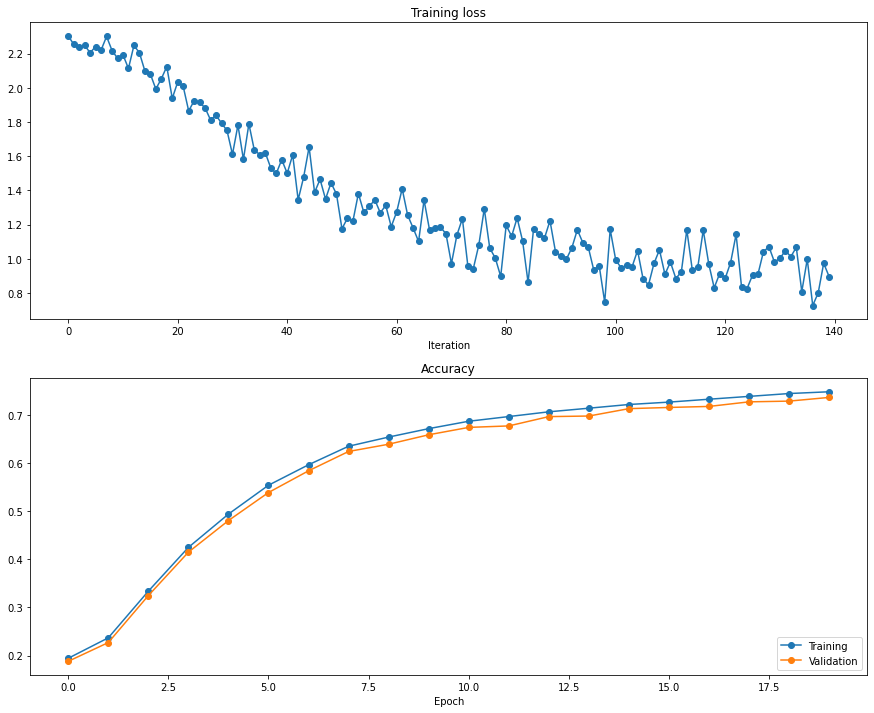

In [8]:
# Plot the learning curves
plt.subplot(2, 1, 1)
plt.title('Training loss')
loss_hist_ = loss_hist[1::100] # sparse the curve a bit
plt.plot(loss_hist_, '-o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(train_acc_hist, '-o', label='Training')
plt.plot(val_acc_hist, '-o', label='Validation')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

## Different Optimizers
There are several more advanced optimizers than vanilla SGD, you will implement three more sophisticated and widely-used methods in this section.  
Please complete the TODOs in the `lib/optim.py`.

## SGD + Momentum [2pt]
The update rule of SGD plus momentum is as shown below:  
\begin{align*}
v_t&: \text{last update of the velocity} \\
\gamma&: \text{momentum} \\
\eta&: \text{learning rate} \\
v_t &= \gamma v_{t-1} - \eta \nabla_{\theta}J(\theta) \\
\theta &= \theta + v_t
\end{align*}
The initial value of $v_t$ is $0$.
Complete the `SGDM()` function in `lib/optim.py`.

In [5]:
%reload_ext autoreload

# Test the implementation of SGD with Momentum
seed = 123
np.random.seed(seed=seed)

N, D = 4, 5
test_sgd = sequential(fc(N, D, name="sgd_fc"))

w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
v = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

test_sgd.layers[0].params = {"sgd_fc_w": w}
test_sgd.layers[0].grads = {"sgd_fc_w": dw}

test_sgd_momentum = SGDM(test_sgd, 1e-3, 0.9)
test_sgd_momentum.velocity = {"sgd_fc_w": v}
test_sgd_momentum.step()

updated_w = test_sgd.layers[0].params["sgd_fc_w"]
velocity = test_sgd_momentum.velocity["sgd_fc_w"]

expected_updated_w = np.asarray([
  [ 0.1406,      0.20738947,  0.27417895,  0.34096842,  0.40775789],
  [ 0.47454737,  0.54133684,  0.60812632,  0.67491579,  0.74170526],
  [ 0.80849474,  0.87528421,  0.94207368,  1.00886316,  1.07565263],
  [ 1.14244211,  1.20923158,  1.27602105,  1.34281053,  1.4096    ]])
expected_velocity = np.asarray([
  [ 0.5406,      0.55475789,  0.56891579, 0.58307368,  0.59723158],
  [ 0.61138947,  0.62554737,  0.63970526,  0.65386316,  0.66802105],
  [ 0.68217895,  0.69633684,  0.71049474,  0.72465263,  0.73881053],
  [ 0.75296842,  0.76712632,  0.78128421,  0.79544211,  0.8096    ]])

print ('The following errors should be around or less than 1e-8')
print ('updated_w error: ', rel_error(updated_w, expected_updated_w))
print ('velocity error: ', rel_error(expected_velocity, velocity))

The following errors should be around or less than 1e-8
updated_w error:  8.882347033505819e-09
velocity error:  4.269287743278663e-09


## Comparing SGD and SGD with Momentum [2pt]
Run the following code block to train a multi-layer fully connected network with both SGD and SGD plus Momentum. The network trained with SGDM optimizer should converge faster.

Training with Vanilla SGD...
(Iteration 1 / 23430) loss: 2.302024602405127
(Iteration 101 / 23430) loss: 2.303460123828989
(Iteration 201 / 23430) loss: 2.268727870891892
(Iteration 301 / 23430) loss: 2.243775120272611
(Iteration 401 / 23430) loss: 2.238319010526329
(Iteration 501 / 23430) loss: 2.2728742533815263
(Iteration 601 / 23430) loss: 2.2451687770884394
(Iteration 701 / 23430) loss: 2.2622141329338215
(Iteration 801 / 23430) loss: 2.2573692693348812
(Iteration 901 / 23430) loss: 2.3380941805908977
(Iteration 1001 / 23430) loss: 2.20257836640194
(Iteration 1101 / 23430) loss: 2.1939285735429026
(Iteration 1201 / 23430) loss: 2.1429886797642244
(Iteration 1301 / 23430) loss: 2.2688718233746474
(Iteration 1401 / 23430) loss: 2.1504753777293333
(Iteration 1501 / 23430) loss: 2.273522970056841
(Epoch 1 / 15) Training Accuracy: 0.1888, Validation Accuracy: 0.18206938900828984
(Iteration 1601 / 23430) loss: 2.2460415185131373
(Iteration 1701 / 23430) loss: 2.3338753090342754
(Iterati

(Iteration 14901 / 23430) loss: 1.683846822287161
(Iteration 15001 / 23430) loss: 1.8905392116039252
(Iteration 15101 / 23430) loss: 1.8586364701283036
(Iteration 15201 / 23430) loss: 1.8125553565722259
(Iteration 15301 / 23430) loss: 1.7567598757902667
(Iteration 15401 / 23430) loss: 2.167239201771908
(Iteration 15501 / 23430) loss: 1.874155247850576
(Iteration 15601 / 23430) loss: 1.8212786941394372
(Epoch 10 / 15) Training Accuracy: 0.33108, Validation Accuracy: 0.32299662265888857
(Iteration 15701 / 23430) loss: 1.7537026231221775
(Iteration 15801 / 23430) loss: 1.972812385494419
(Iteration 15901 / 23430) loss: 1.9557297603941106
(Iteration 16001 / 23430) loss: 1.6281151564229646
(Iteration 16101 / 23430) loss: 1.6006599826254277
(Iteration 16201 / 23430) loss: 1.8956634528890364
(Iteration 16301 / 23430) loss: 1.9344399880350913
(Iteration 16401 / 23430) loss: 1.7226065581114631
(Iteration 16501 / 23430) loss: 1.6073387536486239
(Iteration 16601 / 23430) loss: 1.6019310832310998
(

(Iteration 6201 / 23430) loss: 1.0485770341632774
(Epoch 4 / 15) Training Accuracy: 0.74052, Validation Accuracy: 0.7172244396684065
(Iteration 6301 / 23430) loss: 0.7962859010097212
(Iteration 6401 / 23430) loss: 1.01368402729881
(Iteration 6501 / 23430) loss: 0.7745610388315683
(Iteration 6601 / 23430) loss: 1.0796702008293348
(Iteration 6701 / 23430) loss: 1.295936511908451
(Iteration 6801 / 23430) loss: 0.5457065128384503
(Iteration 6901 / 23430) loss: 0.5387511619912684
(Iteration 7001 / 23430) loss: 0.45974875927731224
(Iteration 7101 / 23430) loss: 1.04568802185889
(Iteration 7201 / 23430) loss: 0.5052441601252371
(Iteration 7301 / 23430) loss: 0.9370747159927763
(Iteration 7401 / 23430) loss: 0.59370979105799
(Iteration 7501 / 23430) loss: 0.5346519619360119
(Iteration 7601 / 23430) loss: 0.5872200211511382
(Iteration 7701 / 23430) loss: 0.5629030652928919
(Iteration 7801 / 23430) loss: 0.6794905762521664
(Epoch 5 / 15) Training Accuracy: 0.78008, Validation Accuracy: 0.7617439

(Iteration 20701 / 23430) loss: 1.1214333450612983
(Iteration 20801 / 23430) loss: 0.3416361088519831
(Iteration 20901 / 23430) loss: 0.4416225224820522
(Iteration 21001 / 23430) loss: 0.39751649801704736
(Iteration 21101 / 23430) loss: 0.5747294079104159
(Iteration 21201 / 23430) loss: 0.48907005584114166
(Iteration 21301 / 23430) loss: 0.31728259039192197
(Iteration 21401 / 23430) loss: 0.248586911878674
(Iteration 21501 / 23430) loss: 0.6365046413400246
(Iteration 21601 / 23430) loss: 0.4424719569098379
(Iteration 21701 / 23430) loss: 0.8771648699270405
(Iteration 21801 / 23430) loss: 0.42864707242566674
(Epoch 14 / 15) Training Accuracy: 0.87568, Validation Accuracy: 0.8213079521031624
(Iteration 21901 / 23430) loss: 0.9321696010107843
(Iteration 22001 / 23430) loss: 0.5230719821192032
(Iteration 22101 / 23430) loss: 0.4254435899728587
(Iteration 22201 / 23430) loss: 0.3947410925355548
(Iteration 22301 / 23430) loss: 0.30907583749507217
(Iteration 22401 / 23430) loss: 0.23693415779

<ipython-input-6-bba27f7634b2>:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3, 1, 1)
<ipython-input-6-bba27f7634b2>:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3, 1, 2)
<ipython-input-6-bba27f7634b2>:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and r

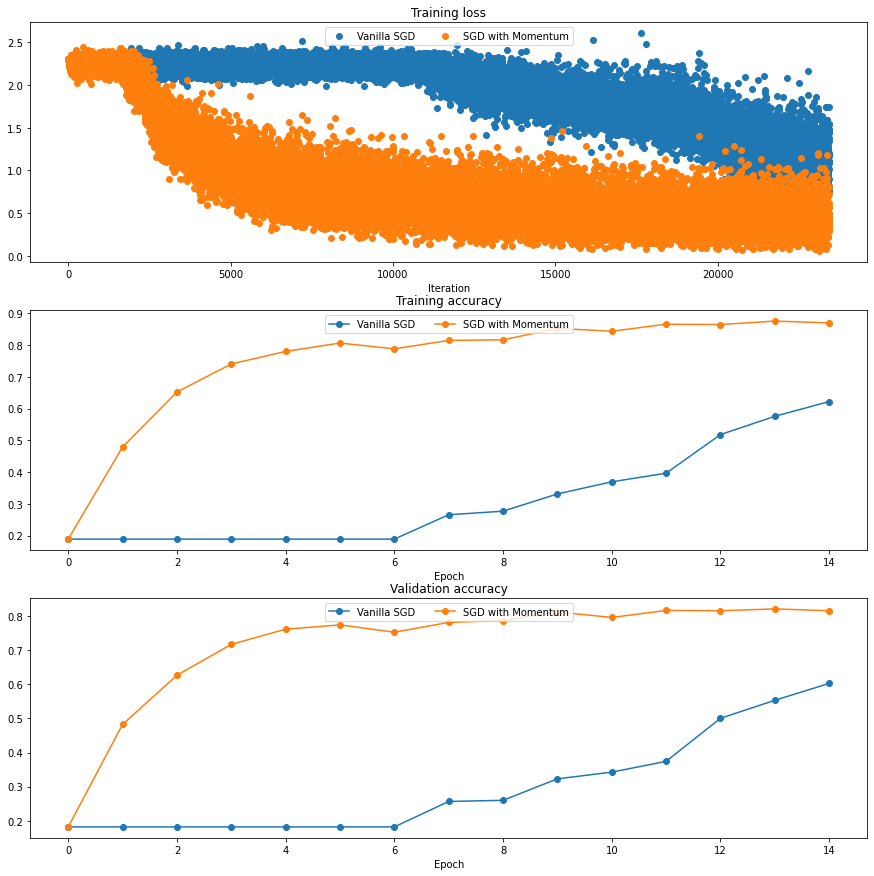

In [6]:
seed = 123
np.random.seed(seed=seed)

# Arrange a small data
num_train = 50000
small_data_dict = {
    "data_train": (data["data_train"][:num_train], data["labels_train"][:num_train]),
    "data_val": (data["data_val"], data["labels_val"]),
    "data_test": (data["data_test"], data["labels_test"])
}

model_sgd      = FullyConnectedNetwork()
model_sgdm     = FullyConnectedNetwork()
loss_f_sgd     = cross_entropy()
loss_f_sgdm    = cross_entropy()
optimizer_sgd  = SGD(model_sgd.net, 1e-2)
optimizer_sgdm = SGDM(model_sgdm.net, 1e-2, 0.9)

print ("Training with Vanilla SGD...")
results_sgd = train_net(small_data_dict, model_sgd, loss_f_sgd, optimizer_sgd, batch_size=32, 
                        max_epochs=15, show_every=100, verbose=True)

print ("\nTraining with SGD plus Momentum...")
results_sgdm = train_net(small_data_dict, model_sgdm, loss_f_sgdm, optimizer_sgdm, batch_size=32, 
                         max_epochs=15, show_every=100, verbose=True)

opt_params_sgd,  loss_hist_sgd,  train_acc_hist_sgd,  val_acc_hist_sgd  = results_sgd
opt_params_sgdm, loss_hist_sgdm, train_acc_hist_sgdm, val_acc_hist_sgdm = results_sgdm

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 1)
plt.plot(loss_hist_sgd, 'o', label="Vanilla SGD")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_sgd, '-o', label="Vanilla SGD")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_sgd, '-o', label="Vanilla SGD")
         
plt.subplot(3, 1, 1)
plt.plot(loss_hist_sgdm, 'o', label="SGD with Momentum")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_sgdm, '-o', label="SGD with Momentum")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_sgdm, '-o', label="SGD with Momentum")
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

## RMSProp [2pt]
The update rule of RMSProp is as shown below:  
\begin{align*}
\gamma &: \text{decay rate} \\
\epsilon &: \text{small number} \\
g_t^2 &: \text{squared gradients} \\
\eta &: \text{learning rate} \\
E[g^2]_t &: \text{decaying average of past squared gradients at update step } t \\
E[g^2]_t &= \gamma E[g^2]_{t-1} + (1-\gamma)g_t^2 \\
\theta_{t+1} &= \theta_t - \frac{\eta \nabla_{\theta}J(\theta)}{\sqrt{E[g^2]_t+\epsilon}}
\end{align*}
Complete the `RMSProp()` function in `lib/optim.py`

In [11]:
%reload_ext autoreload

seed = 123
np.random.seed(seed=seed)

# Test RMSProp implementation; you should see errors less than 1e-7
N, D = 4, 5
test_rms = sequential(fc(N, D, name="rms_fc"))

w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
cache = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

test_rms.layers[0].params = {"rms_fc_w": w}
test_rms.layers[0].grads = {"rms_fc_w": dw}

opt_rms = RMSProp(test_rms, 1e-2, 0.99)
opt_rms.cache = {"rms_fc_w": cache}
opt_rms.step()

updated_w = test_rms.layers[0].params["rms_fc_w"]
cache = opt_rms.cache["rms_fc_w"]

expected_updated_w = np.asarray([
  [-0.39223849, -0.34037513, -0.28849239, -0.23659121, -0.18467247],
  [-0.132737,   -0.08078555, -0.02881884,  0.02316247,  0.07515774],
  [ 0.12716641,  0.17918792,  0.23122175,  0.28326742,  0.33532447],
  [ 0.38739248,  0.43947102,  0.49155973,  0.54365823,  0.59576619]])
expected_cache = np.asarray([
  [ 0.5976,      0.6126277,   0.6277108,   0.64284931,  0.65804321],
  [ 0.67329252,  0.68859723,  0.70395734,  0.71937285,  0.73484377],
  [ 0.75037008,  0.7659518,   0.78158892,  0.79728144,  0.81302936],
  [ 0.82883269,  0.84469141,  0.86060554,  0.87657507,  0.8926    ]])

print ('The following errors should be around or less than 1e-7')
print ('updated_w error: ', rel_error(expected_updated_w, updated_w))
print ('cache error: ', rel_error(expected_cache, opt_rms.cache["rms_fc_w"]))

The following errors should be around or less than 1e-7
updated_w error:  9.502645229894295e-08
cache error:  2.6477955807156126e-09


## Adam [2pt]
The update rule of Adam is as shown below:  
\begin{align*}
t &= t + 1 \\
g_t &: \text{gradients at update step } t \\
m_t &= \beta_1m_{t-1} + (1-\beta_1)g_t \\
v_t &= \beta_2v_{t-1} + (1-\beta_2)g_t^2 \\
\hat{m_t} &= m_t / (1 - \beta_1^t) \\
\hat{v_t} &= v_t / (1 - \beta_2^t) \\
\theta_{t+1} &= \theta_t - \frac{\eta\ \hat{m_t}}{\sqrt{\hat{v_t}}+\epsilon} \\
\end{align*}
Complete the `Adam()` function in `lib/optim.py`
Important Notes:
1) $t$ must be updated before everything else
2) $\beta_1^t$ is $\beta_1$ exponentiated to the $t$'th power

In [14]:
%reload_ext autoreload

seed = 123
np.random.seed(seed=seed)

# Test Adam implementation; you should see errors around 1e-7 or less
N, D = 4, 5
test_adam = sequential(fc(N, D, name="adam_fc"))

w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
m = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)
v = np.linspace(0.7, 0.5, num=N*D).reshape(N, D)

test_adam.layers[0].params = {"adam_fc_w": w}
test_adam.layers[0].grads = {"adam_fc_w": dw}

opt_adam = Adam(test_adam, 1e-2, 0.9, 0.999, t=5)
opt_adam.mt = {"adam_fc_w": m}
opt_adam.vt = {"adam_fc_w": v}
opt_adam.step()

updated_w = test_adam.layers[0].params["adam_fc_w"]
mt = opt_adam.mt["adam_fc_w"]
vt = opt_adam.vt["adam_fc_w"]

expected_updated_w = np.asarray([
  [-0.40094747, -0.34836187, -0.29577703, -0.24319299, -0.19060977],
  [-0.1380274,  -0.08544591, -0.03286534,  0.01971428,  0.0722929],
  [ 0.1248705,   0.17744702,  0.23002243,  0.28259667,  0.33516969],
  [ 0.38774145,  0.44031188,  0.49288093,  0.54544852,  0.59801459]])
expected_v = np.asarray([
  [ 0.69966,     0.68908382,  0.67851319,  0.66794809,  0.65738853,],
  [ 0.64683452,  0.63628604,  0.6257431,   0.61520571,  0.60467385,],
  [ 0.59414753,  0.58362676,  0.57311152,  0.56260183,  0.55209767,],
  [ 0.54159906,  0.53110598,  0.52061845,  0.51013645,  0.49966,   ]])
expected_m = np.asarray([
  [ 0.48,        0.49947368,  0.51894737,  0.53842105,  0.55789474],
  [ 0.57736842,  0.59684211,  0.61631579,  0.63578947,  0.65526316],
  [ 0.67473684,  0.69421053,  0.71368421,  0.73315789,  0.75263158],
  [ 0.77210526,  0.79157895,  0.81105263,  0.83052632,  0.85      ]])

print ('The following errors should be around or less than 1e-7')
print ('updated_w error: ', rel_error(expected_updated_w, updated_w))
print ('mt error: ', rel_error(expected_m, mt))
print ('vt error: ', rel_error(expected_v, vt))

The following errors should be around or less than 1e-7
updated_w error:  1.1395691798535431e-07
mt error:  4.214963193114416e-09
vt error:  4.208314038113071e-09


## Comparing the optimizers [4pt]
Run the following code block to compare the plotted results among all the above optimizers. You should see SGD with Momentum, RMSProp, and Adam optimizers work better than Vanilla SGD optimizer.

Training with RMSProp...
(Iteration 1 / 23430) loss: 2.302024602405127
(Iteration 101 / 23430) loss: 2.2940670222976305
(Iteration 201 / 23430) loss: 1.8933428725035863
(Iteration 301 / 23430) loss: 1.759470224381714
(Iteration 401 / 23430) loss: 1.9503735310840349
(Iteration 501 / 23430) loss: 2.2738583540034556
(Iteration 601 / 23430) loss: 1.7274812520456964
(Iteration 701 / 23430) loss: 1.6806808255188612
(Iteration 801 / 23430) loss: 1.6672283455389891
(Iteration 901 / 23430) loss: 1.7881124837389346
(Iteration 1001 / 23430) loss: 1.364650100078618
(Iteration 1101 / 23430) loss: 1.4273528384828267
(Iteration 1201 / 23430) loss: 1.680970888305625
(Iteration 1301 / 23430) loss: 1.1991114771159421
(Iteration 1401 / 23430) loss: 1.1832867582205844
(Iteration 1501 / 23430) loss: 1.380852843983861
(Epoch 1 / 15) Training Accuracy: 0.59628, Validation Accuracy: 0.578753454098864
(Iteration 1601 / 23430) loss: 1.0052556697343493
(Iteration 1701 / 23430) loss: 1.2379333923390317
(Iteration

(Iteration 14801 / 23430) loss: 0.39802727288026
(Iteration 14901 / 23430) loss: 0.2398404831396645
(Iteration 15001 / 23430) loss: 0.36113495288147496
(Iteration 15101 / 23430) loss: 0.3389692110631398
(Iteration 15201 / 23430) loss: 0.5195864694898651
(Iteration 15301 / 23430) loss: 0.5854906223570151
(Iteration 15401 / 23430) loss: 0.442702615841573
(Iteration 15501 / 23430) loss: 0.5008039078062616
(Iteration 15601 / 23430) loss: 0.29384060432542525
(Epoch 10 / 15) Training Accuracy: 0.85476, Validation Accuracy: 0.8096407737181456
(Iteration 15701 / 23430) loss: 0.37527495035721564
(Iteration 15801 / 23430) loss: 0.7116441542545
(Iteration 15901 / 23430) loss: 0.4559657325057753
(Iteration 16001 / 23430) loss: 0.48066583640179666
(Iteration 16101 / 23430) loss: 0.40069775019140386
(Iteration 16201 / 23430) loss: 0.6396420282123797
(Iteration 16301 / 23430) loss: 0.5501850864282195
(Iteration 16401 / 23430) loss: 0.2939958114003801
(Iteration 16501 / 23430) loss: 0.1565369440334665

(Iteration 6001 / 23430) loss: 0.8135112664553421
(Iteration 6101 / 23430) loss: 0.8962421558148681
(Iteration 6201 / 23430) loss: 0.9774523259866678
(Epoch 4 / 15) Training Accuracy: 0.78358, Validation Accuracy: 0.7580595640159656
(Iteration 6301 / 23430) loss: 0.4289437256704264
(Iteration 6401 / 23430) loss: 0.7757521255610185
(Iteration 6501 / 23430) loss: 0.4849115062975289
(Iteration 6601 / 23430) loss: 0.6062919733817284
(Iteration 6701 / 23430) loss: 1.3224832294546807
(Iteration 6801 / 23430) loss: 0.4539581062174805
(Iteration 6901 / 23430) loss: 0.6418998513744643
(Iteration 7001 / 23430) loss: 0.45030936497287555
(Iteration 7101 / 23430) loss: 1.0260579928928157
(Iteration 7201 / 23430) loss: 0.44260943122481644
(Iteration 7301 / 23430) loss: 0.9010646614206315
(Iteration 7401 / 23430) loss: 0.4555500109511517
(Iteration 7501 / 23430) loss: 0.6683508012939722
(Iteration 7601 / 23430) loss: 0.4956375967228983
(Iteration 7701 / 23430) loss: 0.6099702344737281
(Iteration 7801

(Iteration 20501 / 23430) loss: 0.217672291094471
(Iteration 20601 / 23430) loss: 0.2817191611572571
(Iteration 20701 / 23430) loss: 0.787567502600586
(Iteration 20801 / 23430) loss: 0.41844751281537307
(Iteration 20901 / 23430) loss: 0.3663529187479987
(Iteration 21001 / 23430) loss: 0.40079707093267947
(Iteration 21101 / 23430) loss: 0.4508339492173722
(Iteration 21201 / 23430) loss: 0.4256727489042729
(Iteration 21301 / 23430) loss: 0.3863094119984788
(Iteration 21401 / 23430) loss: 0.26596724294063817
(Iteration 21501 / 23430) loss: 0.541151478545968
(Iteration 21601 / 23430) loss: 0.45741210583552183
(Iteration 21701 / 23430) loss: 0.9276677605567862
(Iteration 21801 / 23430) loss: 0.21475245459612186
(Epoch 14 / 15) Training Accuracy: 0.87512, Validation Accuracy: 0.8096407737181456
(Iteration 21901 / 23430) loss: 0.6005405242059314
(Iteration 22001 / 23430) loss: 0.2806117450559089
(Iteration 22101 / 23430) loss: 0.5402668264664351
(Iteration 22201 / 23430) loss: 0.4990929882296

<ipython-input-15-374d669d38af>:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3, 1, 1)
<ipython-input-15-374d669d38af>:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3, 1, 2)
<ipython-input-15-374d669d38af>:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created an

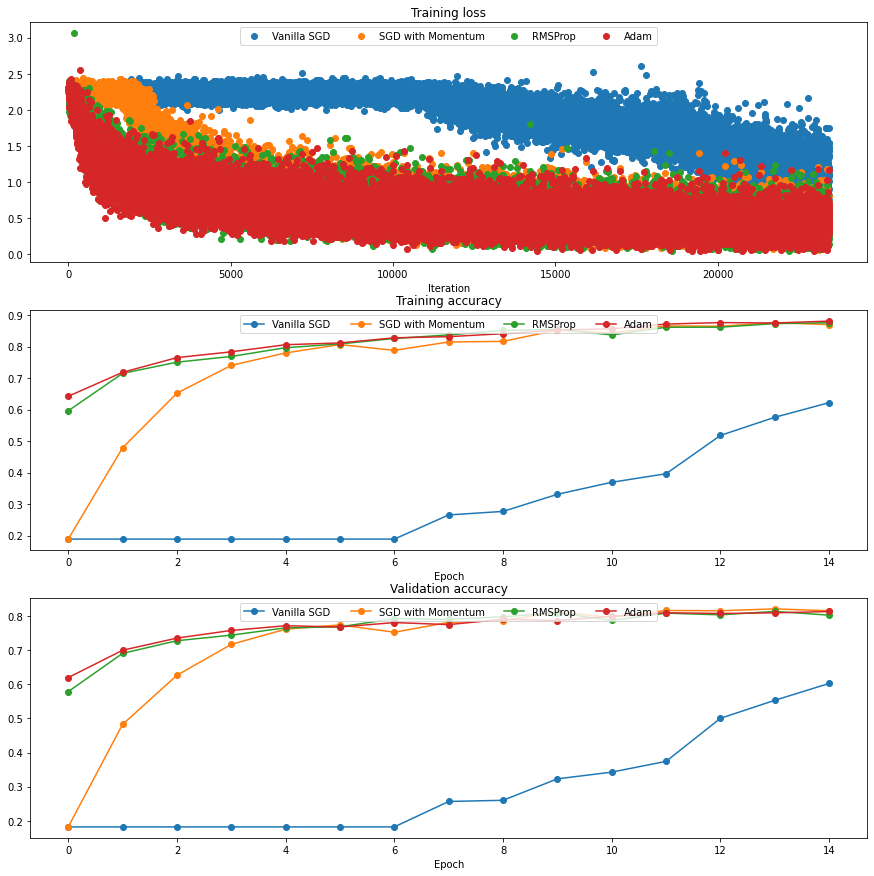

In [15]:
seed = 123
np.random.seed(seed=seed)

model_rms      = FullyConnectedNetwork()
model_adam     = FullyConnectedNetwork()
loss_f_rms     = cross_entropy()
loss_f_adam    = cross_entropy()
optimizer_rms  = RMSProp(model_rms.net, 5e-4)
optimizer_adam = Adam(model_adam.net, 5e-4)

print ("Training with RMSProp...")
results_rms = train_net(small_data_dict, model_rms, loss_f_rms, optimizer_rms, batch_size=32, 
                        max_epochs=15, show_every=100, verbose=True)

print ("\nTraining with Adam...")
results_adam = train_net(small_data_dict, model_adam, loss_f_adam, optimizer_adam, batch_size=32, 
                         max_epochs=15, show_every=100, verbose=True)

opt_params_rms,  loss_hist_rms,  train_acc_hist_rms,  val_acc_hist_rms  = results_rms
opt_params_adam, loss_hist_adam, train_acc_hist_adam, val_acc_hist_adam = results_adam

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 1)
plt.plot(loss_hist_sgd, 'o', label="Vanilla SGD")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_sgd, '-o', label="Vanilla SGD")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_sgd, '-o', label="Vanilla SGD")
         
plt.subplot(3, 1, 1)
plt.plot(loss_hist_sgdm, 'o', label="SGD with Momentum")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_sgdm, '-o', label="SGD with Momentum")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_sgdm, '-o', label="SGD with Momentum")

plt.subplot(3, 1, 1)
plt.plot(loss_hist_rms, 'o', label="RMSProp")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_rms, '-o', label="RMSProp")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_rms, '-o', label="RMSProp")
         
plt.subplot(3, 1, 1)
plt.plot(loss_hist_adam, 'o', label="Adam")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_adam, '-o', label="Adam")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_adam, '-o', label="Adam")
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

## Plot the Activation Functions [3pt]
In each of the activation function, use the given lambda function template to plot their corresponding curves.

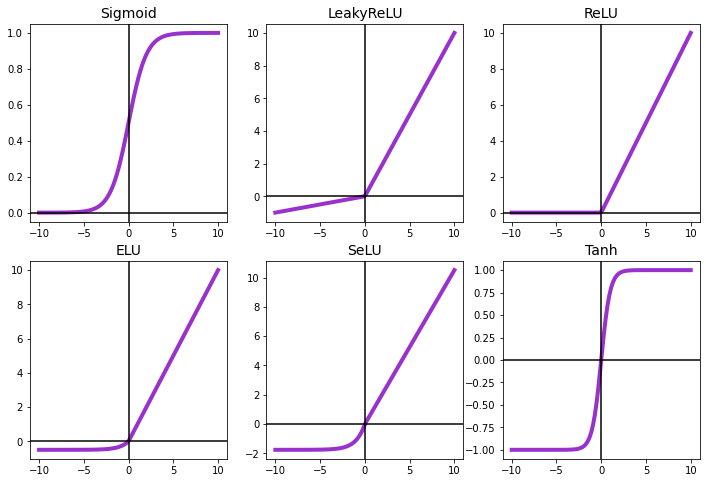

In [28]:
left, right = -10, 10
X  = np.linspace(left, right, 100)
XS = np.linspace(-5, 5, 10)
lw = 4
alpha = 0.1 # alpha for leaky_relu
elu_alpha = 0.5
selu_alpha = 1.6732
selu_scale = 1.0507

###################
# TODO: YOUR CODE #
###################
sigmoid = lambda X: 1/(1+np.exp(-X)) 
leaky_relu = lambda X: np.array([x if x >= 0 else 0.1 * x for x in X]) 
relu = lambda X: np.array([x if x > 0 else 0 for x in X])
elu = lambda X: np.array([x if x >= 0 else elu_alpha * (np.exp(x) - 1) for x in X])
selu = lambda X: np.array([selu_scale * x if x >= 0 else selu_scale * selu_alpha * (np.exp(x) - 1) for x in X])
tanh = lambda X: np.tanh(X)
####################
# END OF YOUR CODE #
####################

activations = {
    "Sigmoid": sigmoid,
    "LeakyReLU": leaky_relu,
    "ReLU": relu,
    "ELU": elu,
    "SeLU": selu,
    "Tanh": tanh
}

# Ground Truth activations
GT_Act = {
    "Sigmoid": [0.00669285092428, 0.0200575365379, 0.0585369028744, 0.158869104881, 0.364576440742, 
                0.635423559258, 0.841130895119, 0.941463097126, 0.979942463462, 0.993307149076],
    "LeakyReLU": [-0.5, -0.388888888889, -0.277777777778, -0.166666666667, -0.0555555555556, 
                  0.555555555556, 1.66666666667, 2.77777777778, 3.88888888889, 5.0],
    "ReLU": [-0.0, -0.0, -0.0, -0.0, -0.0, 0.555555555556, 1.66666666667, 2.77777777778, 3.88888888889, 5.0],
    "ELU": [-0.4966310265, -0.489765962143, -0.468911737989, -0.405562198581, -0.213123289631, 
            0.555555555556, 1.66666666667, 2.77777777778, 3.88888888889, 5.0],
    "SeLU": [-1.74618571868, -1.72204772347, -1.64872296837, -1.42598202974, -0.749354802287, 
             0.583722222222, 1.75116666667, 2.91861111111, 4.08605555556, 5.2535],
    "Tanh": [-0.999909204263, -0.999162466631, -0.992297935288, -0.931109608668, -0.504672397722, 
             0.504672397722, 0.931109608668, 0.992297935288, 0.999162466631, 0.999909204263]
} 

fig = plt.figure(figsize=(12,8))
for i, label in enumerate(activations):
    ax = fig.add_subplot(2, 3, i+1)
    ax.plot(X, activations[label](X), color='darkorchid', lw=lw, label=label)
    assert rel_error(activations[label](XS), GT_Act[label]) < 1e-9, \
           "Your implementation of {} might be wrong".format(label)
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title('{}'.format(label), fontsize=14)
plt.show()

# Submission

Please prepare a PDF document `problem_1_solution.pdf` in the root directory of this repository with all plots and inline answers of your solution. Concretely, the document should contain the following items in strict order:
1. Training loss / accuracy curves for the simple neural network training with >75% validation accuracy
2. Plots for comparing vanilla SGD to SGD + Momentum
3. "Comparing different Optimizers" plots
4. Activation function plot

Note that you still need to submit the jupyter notebook with all generated solutions. We will randomly pick submissions and check that the plots in the PDF and in the notebook are equivalent.